In [1]:
import torch
from torch.autograd import Variable
from torch.autograd import grad
import torch.optim as optim
from tqdm import tqdm
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

### Real function:
$$x(t) = e^{-\lambda t}$$

In [2]:
l = 10
def real(t):
    return torch.exp(-l*t)

### Trial function:
$$\hat{f(t)} = 1 + t * N(t)$$

where N(t) is a neural network with 1 input and 1 output

In [3]:
def f(t, nn):
    return 1 + t * nn(t)

### Differential equation: 
$$\frac{\partial x}{\partial t} = - \lambda x$$

In [4]:
def g(t, nn):
    x = f(t, nn)
    gx, = grad([x], [t], grad_outputs=torch.ones(t.shape), create_graph=True)
    z = gx + l * x
    return z

Define range and neural network parameters

In [5]:
x_min, x_max, step = 0, 1, 0.1

D_in, H, D_out = 1, 10, 1

### Training data: 
(unsupervised, no labels)

In [6]:
x_train = torch.arange(x_min, x_max, step).view(-1, 1)
x = Variable(x_train, requires_grad=True)

Define 
* the neural network architecture (1 hiddel layer, fully connected)
* the loss function (MSE)
* the optimizer (Adam)

In [7]:
seq = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    #torch.nn.ReLU(),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(H, D_out)   
)

criterion = torch.nn.MSELoss(size_average=False)
#criterion = torch.nn.L1Loss(size_average=False)

optimizer = optim.Adam(seq.parameters(), lr=5e-4)

### Train the network

In [8]:
n_epoch = 50000
Loss = []
for t in tqdm(range(n_epoch)): 
    y = g(x, seq)
    loss = criterion(y, torch.zeros(y.shape))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    Loss.append(loss.data.numpy())

100%|██████████| 50000/50000 [00:17<00:00, 2870.43it/s]


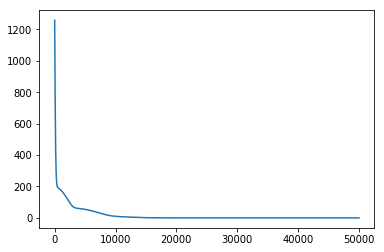

In [9]:
plt.plot(Loss)
plt.show()

### Test data:

In [10]:
x_test = torch.arange(x_min, x_max, 0.001).view(-1, 1)
xt = Variable(x_test, requires_grad=True)

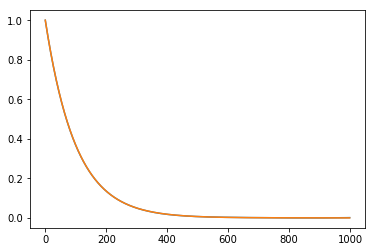

In [11]:
plt.plot(f(xt, seq).data.numpy())
plt.plot(real(xt).data.numpy())
plt.show()

Difference between the real and the learned function: 

In [12]:
diff = f(xt, seq) - real(xt)

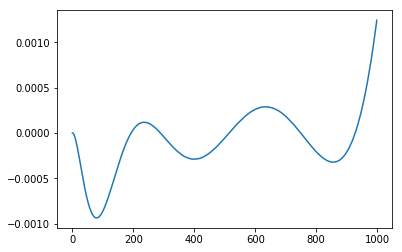

In [13]:
plt.plot(diff.data.numpy())
plt.show()